In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics

In [22]:
# loading the data from csv file to pandas dataframe
House_dataset = pd.read_csv('D:\Projects\AY21TECSM50115 Aditya Subhash Kini\AY21TECSM50115 Aditya Subhash Kini\House Price Prediction/Mumbai1.csv')

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\adity\AppData\Local\Temp\ipykernel_39856\1321224768.py:2: SyntaxWarning: invalid escape sequence '\P'
  House_dataset = pd.read_csv('D:\Projects\AY21TECSM50115 Aditya Subhash Kini\AY21TECSM50115 Aditya Subhash Kini\House Price Prediction/Mumbai1.csv')


In [23]:
# inspecting the first 5 rows of the dataframe
House_dataset.head()

,Price,Area,Location,Bedrooms,New_Resale
0,4500000,600,Kharghar,1,0
1,6700000,650,Kharghar,1,0
2,4500000,650,Kharghar,1,0
3,5000000,665,Kharghar,1,0
4,12500000,1550,Kharghar,3,0


In [24]:
# checking the number of rows and columns
House_dataset.shape

(1303, 5)

In [25]:
# checking the number of rows and columns
House_dataset.shape

(1303, 5)

In [26]:
# getting some information about the dataset
House_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Price       1303 non-null   int64 
 1   Area        1303 non-null   int64 
 2   Location    1303 non-null   object
 3   Bedrooms    1303 non-null   int64 
 4   New_Resale  1303 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 51.0+ KB


In [27]:
# checking the number of missing values
House_dataset.isnull().sum()

Price         0
Area          0
Location      0
Bedrooms      0
New_Resale    0
dtype: int64

In [28]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = House_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map
g=sns.heatmap(House_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

ValueError: could not convert string to float: 'Kharghar'

In [29]:
# checking the distribution of categorical data
print(House_dataset.Bedrooms.value_counts())
print(House_dataset.Location.value_counts())


Bedrooms
2    593
1    439
3    271
Name: count, dtype: int64
Location
Kharghar          512
Thane West        405
Mira Road East    386
Name: count, dtype: int64


In [30]:
# encoding "Location" Column
House_dataset.replace({'Location':{'Kharghar':0,'Thane West':1,'Mira Road East':2}},inplace=True)

C:\Users\adity\AppData\Local\Temp\ipykernel_39856\3295585982.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  House_dataset.replace({'Location':{'Kharghar':0,'Thane West':1,'Mira Road East':2}},inplace=True)


In [31]:
House_dataset.head()

,Price,Area,Location,Bedrooms,New_Resale
0,4500000,600,0,1,0
1,6700000,650,0,1,0
2,4500000,650,0,1,0
3,5000000,665,0,1,0
4,12500000,1550,0,3,0


In [32]:

Y = House_dataset['Price']

In [33]:
print(Y)

0        4500000
1        6700000
2        4500000
3        5000000
4       12500000
          ...   
1298    10800000
1299     7200000
1300     7000000
1301    14500000
1302    14500000
Name: Price, Length: 1303, dtype: int64


In [34]:
X = House_dataset.drop(['Price'],axis=1)

In [35]:
print(X)

      Area  Location  Bedrooms  New_Resale
0      600         0         1           0
1      650         0         1           0
2      650         0         1           0
3      665         0         1           0
4     1550         0         3           0
...    ...       ...       ...         ...
1298  1180         2         2           1
1299   995         2         2           1
1300  1020         2         2           1
1301   900         1         2           0
1302   900         1         2           0

[1303 rows x 4 columns]


In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [37]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [38]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [39]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [40]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6684083330520239


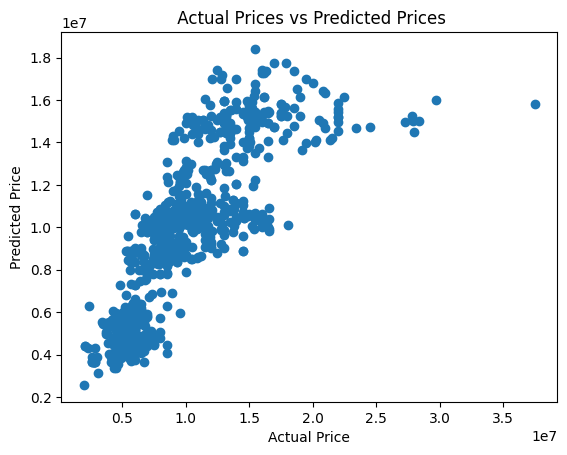

In [41]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [42]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [43]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.69364207526814


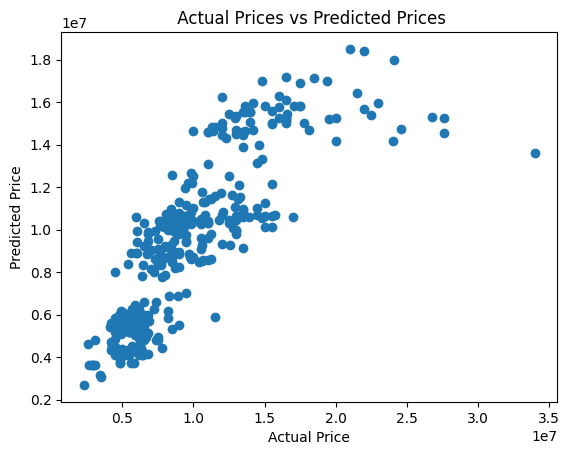

In [44]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [45]:
import pickle

In [46]:
pickle.dump(lin_reg_model,open('LinearRegressionModelH.pkl','wb'))

In [47]:
lin_reg_model.predict(pd.DataFrame([[681,2,1,0]],columns=['Area','Location','Bedrooms','New_Resale']))

array([4203718.24027015])

In [48]:
# loading the Ridge regression model
Rid_reg_model = Ridge()

In [49]:
Rid_reg_model.fit(X_train,Y_train)

Ridge()

In [50]:
# prediction on Training data
training_data_prediction = Rid_reg_model.predict(X_train)

In [51]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6684038586030705


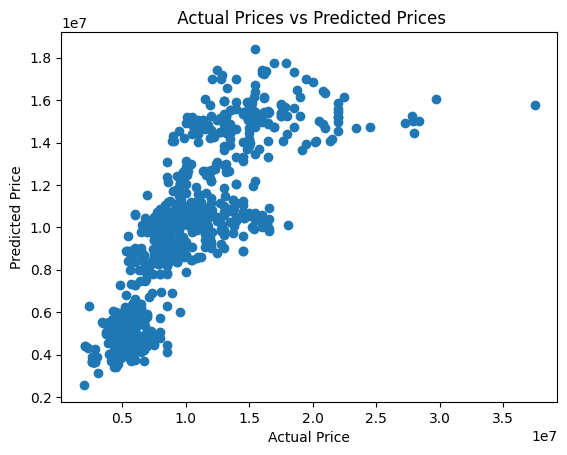

In [52]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [53]:
# prediction on Training data
test_data_prediction = Rid_reg_model.predict(X_test)

In [54]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6939338876021828


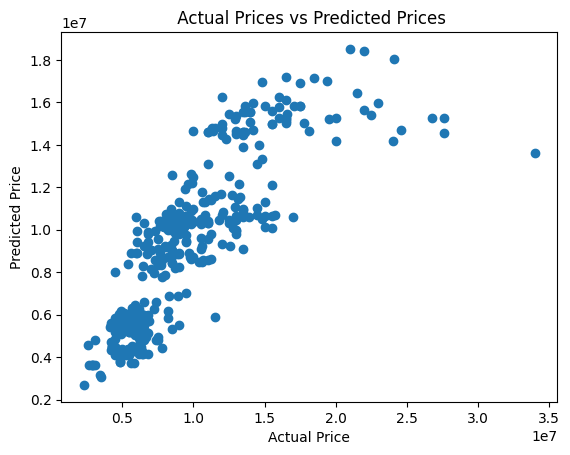

In [55]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()